<a href="https://colab.research.google.com/github/wewerthonc/AI-projects/blob/main/WewerthonCardoso_Implementacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import random
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from collections import Counter, defaultdict
from typing import List, Dict, Tuple

In [ ]:
train_val_df = pd.read_csv('drive/MyDrive/Datasets/nlp_getting_started/train.csv', usecols=['text', 'target'])
test_df = pd.read_csv('drive/MyDrive/Datasets/nlp_getting_started/test.csv', usecols=['text'])
sub_df = pd.read_csv('drive/MyDrive/Datasets/nlp_getting_started/sample_submission.csv')


In [ ]:
train_val_df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [ ]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


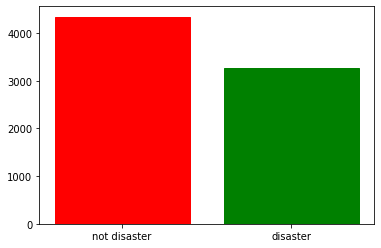

In [ ]:
x = ['not disaster', 'disaster']
y = [len(train_val_df[train_val_df.target == 0]), len(train_val_df[train_val_df.target == 1])]
barlist = plt.bar(x, y)
barlist[0].set_color('red')
barlist[1].set_color('green')
plt.show()

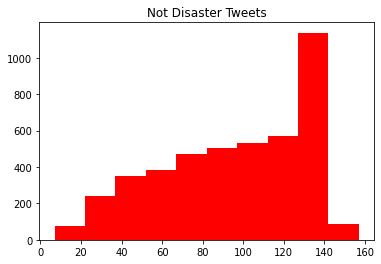

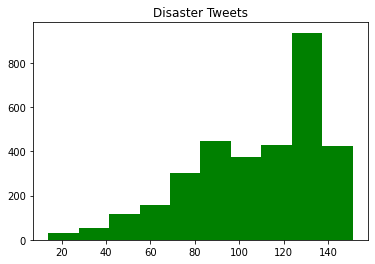

In [ ]:
#Number of characters in each tweet
number_characters_not_disaster = [len(x_i) for x_i in train_val_df[train_val_df.target == 0].text]
plt.hist(number_characters_not_disaster, color = 'red')
plt.title('Not Disaster Tweets')
plt.show()

number_characters_disaster = [len(x_i) for x_i in train_val_df[train_val_df.target == 1].text]
plt.hist(number_characters_disaster, color = 'green')
plt.title('Disaster Tweets')
plt.show()

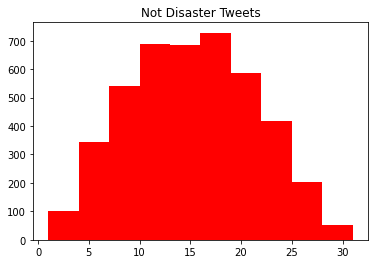

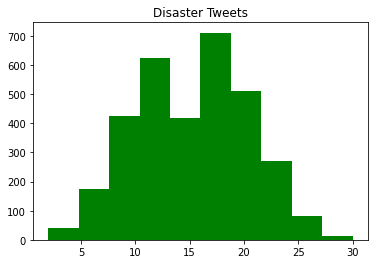

In [ ]:
#Number of words in each tweet
number_words_not_disaster = [len(x_i.split()) for x_i in train_val_df[train_val_df.target == 0].text]
plt.hist(number_words_not_disaster, color = 'red')
plt.title('Not Disaster Tweets')
plt.show()

number_words_disaster = [len(x_i.split()) for x_i in train_val_df[train_val_df.target == 1].text]
plt.hist(number_words_disaster , color = 'green')
plt.title('Disaster Tweets')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


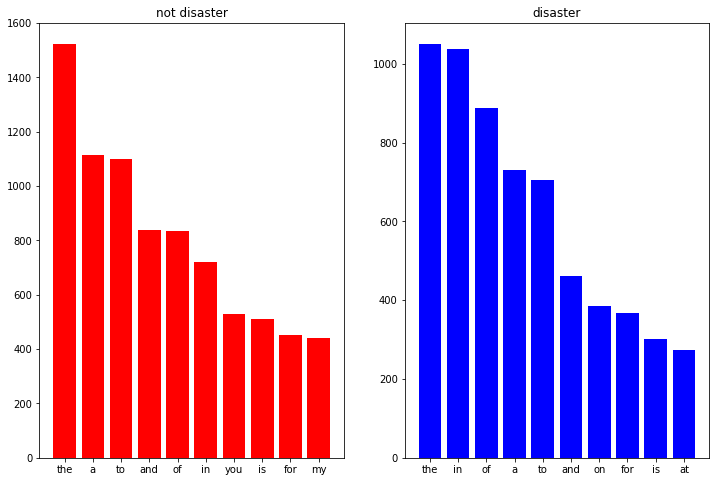

In [ ]:
# Checking for stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')

words_not_disaster = []
for tweet in train_val_df[train_val_df.target == 0]['text']:
  for word in tweet.split():
    if word in stopwords:
      words_not_disaster.append(word)

words_not_disaster = Counter(words_not_disaster).most_common(10)
quantities_not_disaster = [x_i for x_i, _ in words_not_disaster]
words_not_disaster = [y_i for _, y_i in words_not_disaster]

words_disaster = []
for tweet in train_val_df[train_val_df.target == 1]['text']:
  for word in tweet.split():
    if word in stopwords:
      words_disaster.append(word)

words_disaster = Counter(words_disaster).most_common(10)
quantities_disaster = [x_i for x_i, _ in words_disaster]
words_disaster = [y_i for _, y_i in words_disaster]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))


ax1.bar(quantities_not_disaster, words_not_disaster, color='r')
ax1.title.set_text('not disaster')
ax2.bar(quantities_disaster, words_disaster, color='b')
ax2.title.set_text('disaster')
plt.show()

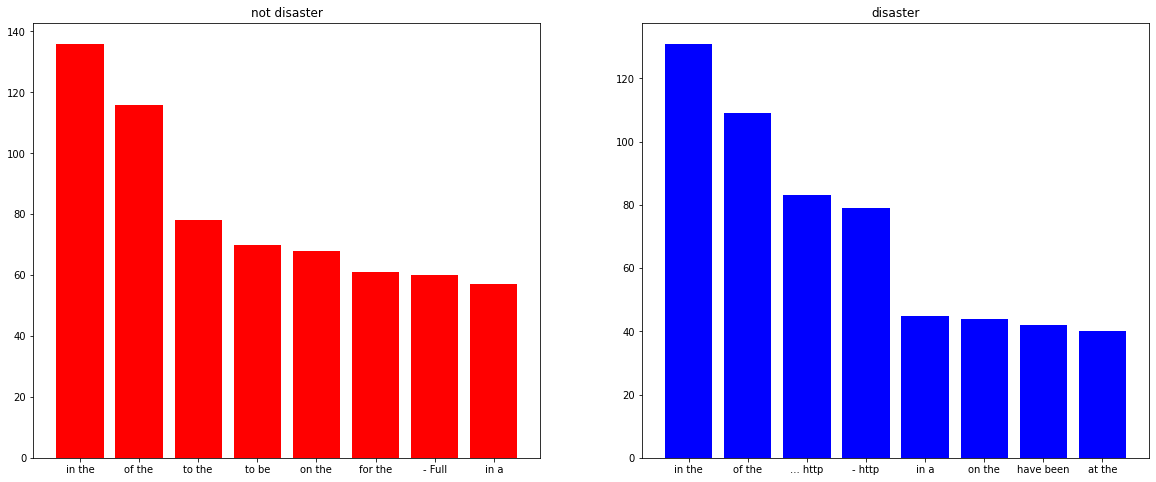

In [ ]:
#Bigrams
import re
bigrams_not_disaster = []

for x_i in train_val_df[train_val_df.target == 0].text:
  for y_i in range(1, len(re.split("[:\s]\s*", x_i))):
    splited_sentence = re.split("[:\s]\s*", x_i)
    bigrams_not_disaster.append((f'{splited_sentence[y_i - 1]} {splited_sentence[y_i]}'))

bigrams_disaster = []

for x_i in train_val_df[train_val_df.target == 1].text:
  for y_i in range(1, len(re.split("[:\s]\s*", x_i))):
    splited_sentence = re.split("[:\s]\s*", x_i)
    bigrams_disaster.append((f'{splited_sentence[y_i - 1]} {splited_sentence[y_i]}'))

counter_b_not_disaster = Counter(bigrams_not_disaster).most_common(8)
counter_b_disaster = Counter(bigrams_disaster).most_common(8)

x_b_not_disaster = []
y_b_not_disaster = []

for bigram in counter_b_not_disaster:
  x_b_not_disaster.append(bigram[0])
  y_b_not_disaster.append(bigram[1])

x_b_disaster = []
y_b_disaster = []

for bigram in counter_b_disaster:
  x_b_disaster.append(bigram[0])
  y_b_disaster.append(bigram[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
ax1.bar(x_b_not_disaster, y_b_not_disaster, color='r')
ax1.title.set_text('not disaster')
ax2.bar(x_b_disaster, y_b_disaster, color='b')
ax2.title.set_text('disaster')
plt.show()

In [ ]:
train_val_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_val_df.tail()

,text,target
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1



#Data Cleaning


In [ ]:
def remove_trash(text):
  #fonte: https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())

train_val_df['text'] = train_val_df['text'].apply(lambda x: remove_trash(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_trash(x))

In [ ]:
remove_trash("@shawn Titanic tragedy could have been prevented 😮​😮​😮​ Economic Times: Telegraph.co.ukTitanic tragedy could have been preve... http://bit.ly/tuN2wx")

'Titanic tragedy could have been prevented Economic Times Telegraph co ukTitanic tragedy could have been preve'

In [ ]:
#Removing stop words

train_val_df_ws = train_val_df.copy()
test_df_ws = test_df.copy()

for i in range(0, len(train_val_df)):
  train_val_df_ws['text'][i] = [word for word in train_val_df['text'][i].split(' ') if not word in stopwords]
  
for i in range(0, len(train_val_df)):
  train_val_df_ws['text'][i] = " ".join(train_val_df_ws['text'][i])

for i in range(0, len(test_df)):
  test_df_ws['text'][i] = [word for word in test_df['text'][i].split(' ') if not word in stopwords]
  
for i in range(0, len(test_df)):
  test_df_ws['text'][i] = " ".join(test_df_ws['text'][i])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Correcting misspellings

!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_misspellings(text):
  corrected_text = []
  misspelled = spell.unknown(text.split())
  splitted_sentence = np.array(text.split())

  for word in splitted_sentence:
    if word in misspelled:
      corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  
  return " ".join(corrected_text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 4.7 MB/s 


In [ ]:
train_val_df_ws['text'] = train_val_df_ws['text'].apply(lambda x: correct_misspellings(x))
test_df_ws['text'] = test_df_ws['text'].apply(lambda x: correct_misspellings(x))

In [ ]:
len(train_val_df_ws[train_val_df.target == 1]), len(train_val_df_ws[train_val_df.target == 0])

(3271, 4342)

In [ ]:
test_X_ws = test_df_ws['text'].to_numpy()
train_X, val_X, train_y, val_y = train_test_split(train_val_df_ws['text'].to_numpy(),
                                                  train_val_df_ws['target'].to_numpy(),
                                                  train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
(len(train_X), len(train_y)), (len(val_X), len(val_y)), len(test_X_ws)

((6090, 6090), (1523, 1523), 3263)

In [ ]:
import tensorflow_hub as hub

pretrained_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", dtype=tf.string) 

In [ ]:
model = tf.keras.Sequential([
    pretrained_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
tf.random.set_seed(42)
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Recall(), 
                       tf.keras.metrics.Precision()])

In [ ]:
model.evaluate(train_X, train_y)
model.evaluate(val_X, val_y)

48/48 [==============================] - 0s 10ms/step - loss: 0.6987 - accuracy: 0.4399 - recall: 0.9183 - precision: 0.4269


[0.6986730694770813,
 0.43992120027542114,
 0.9183359146118164,
 0.4269340932369232]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_y, epochs=10, validation_data = (val_X, val_y))

Epoch 1/10
191/191 [==============================] - 5s 13ms/step - loss: 0.5236 - accuracy: 0.7657 - recall: 0.7498 - precision: 0.7183 - val_loss: 0.4477 - val_accuracy: 0.7991 - val_recall: 0.6918 - val_precision: 0.8090
Epoch 2/10
191/191 [==============================] - 2s 13ms/step - loss: 0.4233 - accuracy: 0.8110 - recall: 0.7422 - precision: 0.8038 - val_loss: 0.4273 - val_accuracy: 0.8011 - val_recall: 0.7411 - val_precision: 0.7808
Epoch 3/10
191/191 [==============================] - 2s 12ms/step - loss: 0.4071 - accuracy: 0.8179 - recall: 0.7498 - precision: 0.8127 - val_loss: 0.4268 - val_accuracy: 0.8089 - val_recall: 0.7273 - val_precision: 0.8055
Epoch 4/10
191/191 [==============================] - 2s 13ms/step - loss: 0.3965 - accuracy: 0.8225 - recall: 0.7502 - precision: 0.8220 - val_loss: 0.4258 - val_accuracy: 0.8096 - val_recall: 0.7211 - val_precision: 0.8111
Epoch 5/10
191/191 [==============================] - 2s 13ms/step - loss: 0.3897 - accuracy: 0.8256

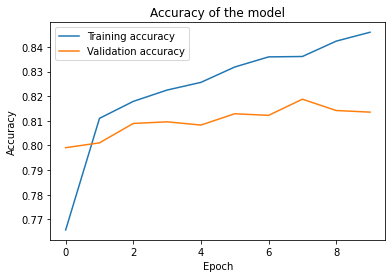

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

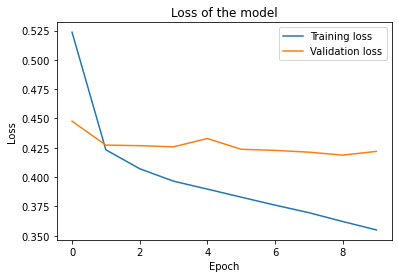

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

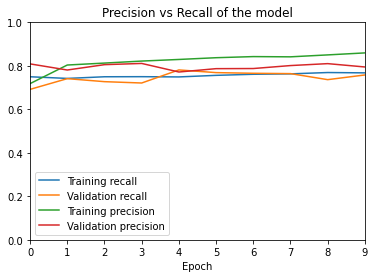

In [ ]:
#Plot name can change according to the amount of times you run
plt.plot(history.history['recall'], label = 'Training recall')
plt.plot(history.history['val_recall'], label = 'Validation recall')
plt.plot(history.history['precision'], label = 'Training precision')
plt.plot(history.history['val_precision'], label = 'Validation precision')
plt.axis([0, 9, 0, 1])
plt.title('Precision vs Recall of the model')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Without removing stop words


In [ ]:
train_val_df['text'] = train_val_df['text'].apply(lambda x: correct_misspellings(x))
test_df['text'] = test_df['text'].apply(lambda x: correct_misspellings(x))

In [ ]:
test_X = test_df['text'].to_numpy()
train_X, val_X, train_y, val_y = train_test_split(train_val_df['text'].to_numpy(),
                                                  train_val_df['target'].to_numpy(),
                                                  train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
model_2 = tf.keras.Sequential([
    pretrained_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
tf.random.set_seed(42)
model_2.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Recall(), 
                       tf.keras.metrics.Precision()])

In [ ]:
history_2 = model_2.fit(train_X, train_y, epochs=10, validation_data = (val_X, val_y))

Epoch 1/10
191/191 [==============================] - 4s 16ms/step - loss: 0.5169 - accuracy: 0.7714 - recall_1: 0.7593 - precision_1: 0.7235 - val_loss: 0.4314 - val_accuracy: 0.8056 - val_recall_1: 0.6841 - val_precision_1: 0.8299
Epoch 2/10
191/191 [==============================] - 3s 13ms/step - loss: 0.4155 - accuracy: 0.8194 - recall_1: 0.7521 - precision_1: 0.8142 - val_loss: 0.4094 - val_accuracy: 0.8155 - val_recall_1: 0.7411 - val_precision_1: 0.8098
Epoch 3/10
191/191 [==============================] - 3s 13ms/step - loss: 0.3981 - accuracy: 0.8232 - recall_1: 0.7548 - precision_1: 0.8201 - val_loss: 0.4094 - val_accuracy: 0.8188 - val_recall_1: 0.7211 - val_precision_1: 0.8313
Epoch 4/10
191/191 [==============================] - 3s 13ms/step - loss: 0.3867 - accuracy: 0.8287 - recall_1: 0.7567 - precision_1: 0.8305 - val_loss: 0.4083 - val_accuracy: 0.8221 - val_recall_1: 0.7119 - val_precision_1: 0.8462
Epoch 5/10
191/191 [==============================] - 2s 13ms/step -

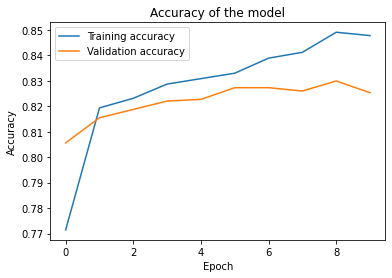

In [ ]:
plt.plot(history_2.history['accuracy'], label = 'Training accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

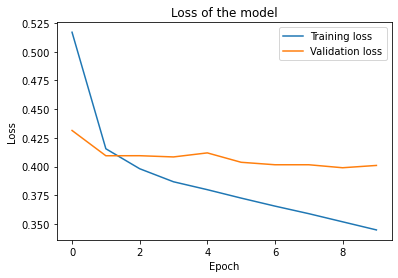

In [ ]:
plt.plot(history_2.history['loss'], label = 'Training loss')
plt.plot(history_2.history['val_loss'], label = 'Validation loss')
plt.title('Loss of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

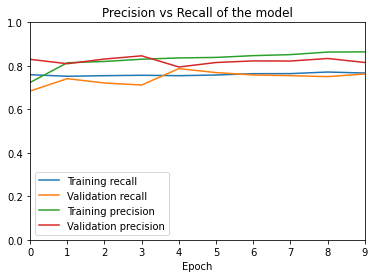

In [ ]:
plt.plot(history_2.history['recall_1'], label = 'Training recall')
plt.plot(history_2.history['val_recall_1'], label = 'Validation recall')
plt.plot(history_2.history['precision_1'], label = 'Training precision')
plt.plot(history_2.history['val_precision_1'], label = 'Validation precision')
plt.axis([0, 9, 0, 1])
plt.title('Precision vs Recall of the model')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Predictions:

In [ ]:
pred_1 = model.predict(test_X_ws)
pred_1 = np.round(pred_1).astype(int).reshape(3263)
sub_1 = pd.DataFrame({'id': sub_df['id'].values.tolist(),'target':pred_1})
sub_1.to_csv('submission_1.csv',index=False)

In [ ]:
pred_2 = model_2.predict(test_X)
pred_2 = np.round(pred_2).astype(int).reshape(3263)
sub_2 = pd.DataFrame({'id': sub_df['id'].values.tolist(),'target':pred_2})
sub_2.to_csv('submission_2.csv',index=False)